# ME 793 Assignment 3
Moitreyee Sarkar- 18D170020


In [38]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
#read excel data file
dp = pd.read_excel('/content/drive/MyDrive/Periodic_table_data.xlsx')      
dp

,Symbol,Atomic Number,Electronegativity,Atomic Radii (pm),Thermal Conductivity,Density,Crystal System
0,H,1,2.20,53.0,0.1805,0.000090,Simple Hexagonal
1,He,2,NaN,31.0,0.1513,0.000179,Face Centered Cubic
2,Li,3,0.98,167.0,85.0000,0.534000,Body Centered Cubic
3,Be,4,1.57,112.0,190.0000,1.850000,Simple Hexagonal
4,B,5,2.04,87.0,27.0000,2.340000,Simple Trigonal
...,...,...,...,...,...,...,...
113,Fl,114,NaN,NaN,NaN,NaN,NaN
114,Mc,115,NaN,NaN,NaN,NaN,NaN
115,Lv,116,NaN,NaN,NaN,NaN,NaN
116,Ts,117,NaN,NaN,NaN,NaN,NaN


In [39]:
print("Total no. of rows:", dp.shape[0])
print("Total no. of columns:", dp.shape[1])

Total no. of rows: 118
Total no. of columns: 7


In [40]:
dp = dp.dropna(subset=['Crystal System'])
dp.info()
print("No. of rows after dropping those with no crystal system data:", dp.shape[0])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 117
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Symbol                113 non-null    object 
 1   Atomic Number         113 non-null    int64  
 2   Electronegativity     96 non-null     float64
 3   Atomic Radii (pm)     86 non-null     float64
 4   Thermal Conductivity  94 non-null     float64
 5   Density               105 non-null    float64
 6   Crystal System        113 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 7.1+ KB
No. of rows after dropping those with no crystal system data: 113


For electronegativity, raddi, thermal conductivity and density, do the following analysis:

• Plot these values on the Y-axis vs. elements on the X-axis.

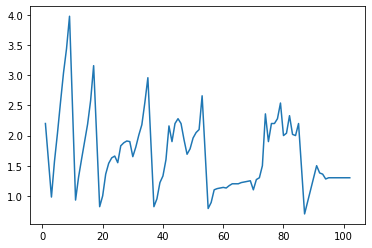

In [41]:
# Plotting eletronegativity v/s Elements
dp_en = dp[dp["Electronegativity"].notnull()]
plt.plot(dp_en['Atomic Number'], dp_en['Electronegativity'])

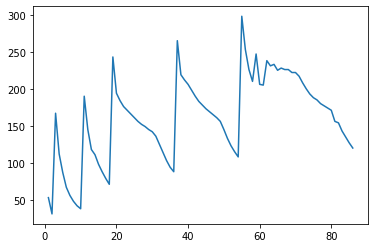

In [42]:
# Plotting radii v/s Elements
dp_rad = dp[dp["Atomic Radii (pm)"].notnull()]
plt.plot(dp_rad['Atomic Number'], dp_rad['Atomic Radii (pm)'])

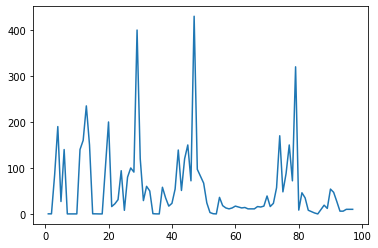

In [43]:
# Plotting thermal conductivity v/s Elements
dp_tc = dp[dp['Thermal Conductivity'].notnull()]
plt.plot(dp_tc['Atomic Number'], dp_tc['Thermal Conductivity'])

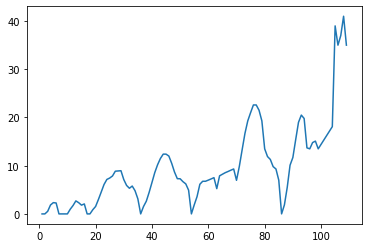

In [44]:
# Plotting Density v/s Elements
dp_den = dp[dp['Density'].notnull()]
plt.plot(dp_den['Atomic Number'], dp_den['Density'])

• Arrange in increasing order, divide the span of the values of each of these into 10 equal size bins,
count the number of elements in each bin and plot number of elements on the Y-axis vs. bins on the
X-axis.

In [45]:
def bin_counts(data, col):
    data = data.sort_values(by=[col])
    col_range = data[col].max() - data[col].min()
    bin_size = col_range/10
    bins = []
    for i in list(np.arange(data[col].min(), data[col].max(), bin_size)):
        if i+bin_size > data[col].max():
            bins.append([i, data[col].max()])
            break
        else:
            bins.append([i, i+bin_size])
    counts = [0]*10
    for i, bin_ in enumerate(bins):
        idx = 0
        for j, val in enumerate(data[col][idx:]):
            if val >= bin_[0] and val < bin_[1]:
                counts[i] += 1
            if val > bin_[1]:
                idx = j
                break
    counts[i] += 1 # to add the element count having the maximum value
    return bins, counts

[[0.7, 1.028], [1.028, 1.356], [1.356, 1.6840000000000002], [1.6840000000000002, 2.012], [2.0120000000000005, 2.3400000000000003], [2.3400000000000003, 2.668], [2.668, 2.996], [2.9960000000000004, 3.3240000000000003], [3.3240000000000007, 3.6520000000000006], [3.652000000000001, 3.98]]


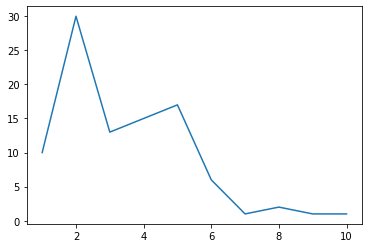

In [46]:
# Bins for electronegativity values
en_bins, en_counts = bin_counts(dp, 'Electronegativity')
print(en_bins)
plt.plot(np.arange(1,11,1), en_counts)

[[31.0, 57.7], [57.7, 84.4], [84.4, 111.10000000000001], [111.10000000000001, 137.8], [137.8, 164.5], [164.5, 191.2], [191.20000000000002, 217.9], [217.90000000000003, 244.60000000000002], [244.60000000000002, 271.3], [271.3, 298.0]]


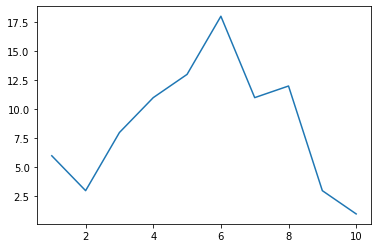

In [47]:
# Bins for Atomic Radii Values
ar_bins, ar_counts = bin_counts(dp, 'Atomic Radii (pm)')
print(ar_bins)
plt.plot(np.arange(1,11,1), ar_counts)

[[0.00361, 43.003249000000004], [43.003249000000004, 86.00288800000001], [86.002888, 129.002527], [129.00252700000001, 172.00216600000002], [172.00216600000002, 215.00180500000002], [215.00180500000002, 258.001444], [258.001444, 301.001083], [301.001083, 344.000722], [344.000722, 387.000361], [387.000361, 430.0]]


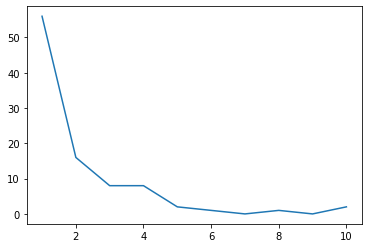

In [48]:
# Bins for Thermal Conductivity values
tc_bins, tc_counts = bin_counts(dp, 'Thermal Conductivity')
print(tc_bins)
plt.plot(np.arange(1,11,1), tc_counts)

[[8.99e-05, 4.10008091], [4.10008091, 8.20007192], [8.200071920000001, 12.300062930000001], [12.300062930000001, 16.40005394], [16.40005394, 20.50004495], [20.50004495, 24.60003596], [24.60003596, 28.70002697], [28.70002697, 32.80001798], [32.80001798, 36.90000899], [36.900008989999996, 41.0]]


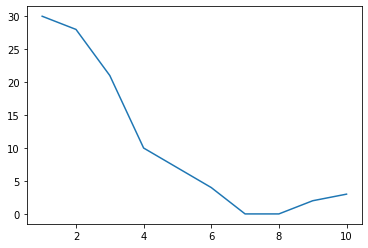

In [49]:
# Bins for Density values
d_bins, d_counts = bin_counts(dp, 'Density')
print(d_bins)
plt.plot(np.arange(1,11,1), d_counts)

Make bins of crystal systems, count the number of elements falling in each crystal system and plot the
number of elements in each bin on Y-axis vs. bin on the X-axis. Analyze and describe your observations
in the context of probability distributions.


In [50]:
cs_counts = dp['Crystal System'].value_counts()
cs_df = pd.DataFrame(cs_counts)
cs_df

,Crystal System
Simple Hexagonal,39
Face Centered Cubic,28
Body Centered Cubic,22
Simple Trigonal,6
Base Centered Orthorhombic,5
Base Centered Monoclinic,3
Centered Tetragonal,3
Simple Monoclinic,2
Tetrahedral Packing,1
Simple Triclinic,1


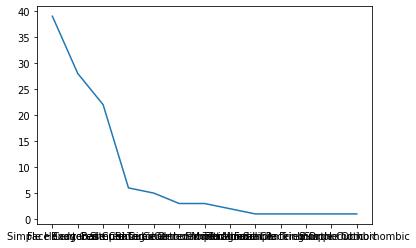

In [51]:
plt.plot(cs_df.index, cs_df['Crystal System'])

2. If you were to apply PCA on your master data set collected in Q. 1, what could you find? Any interesting trends / observation?